In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.375.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.704.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.8597.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5740.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5703.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7717.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2618.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.1956.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5608.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5646.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7267.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5341.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7792.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2888.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.3808.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.838

## Importing libraries

In [2]:

import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
  
import warnings 
warnings.filterwarnings('ignore') 
  
from tensorflow import keras 
from keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory 
  
import os 
import matplotlib.image as mpimg

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importing Dataset

In [3]:
path = '/kaggle/input/dogs-vs-cats/train'
classes = os.listdir(path) 
classes 

['dogs', 'cats']

## Data Visualization

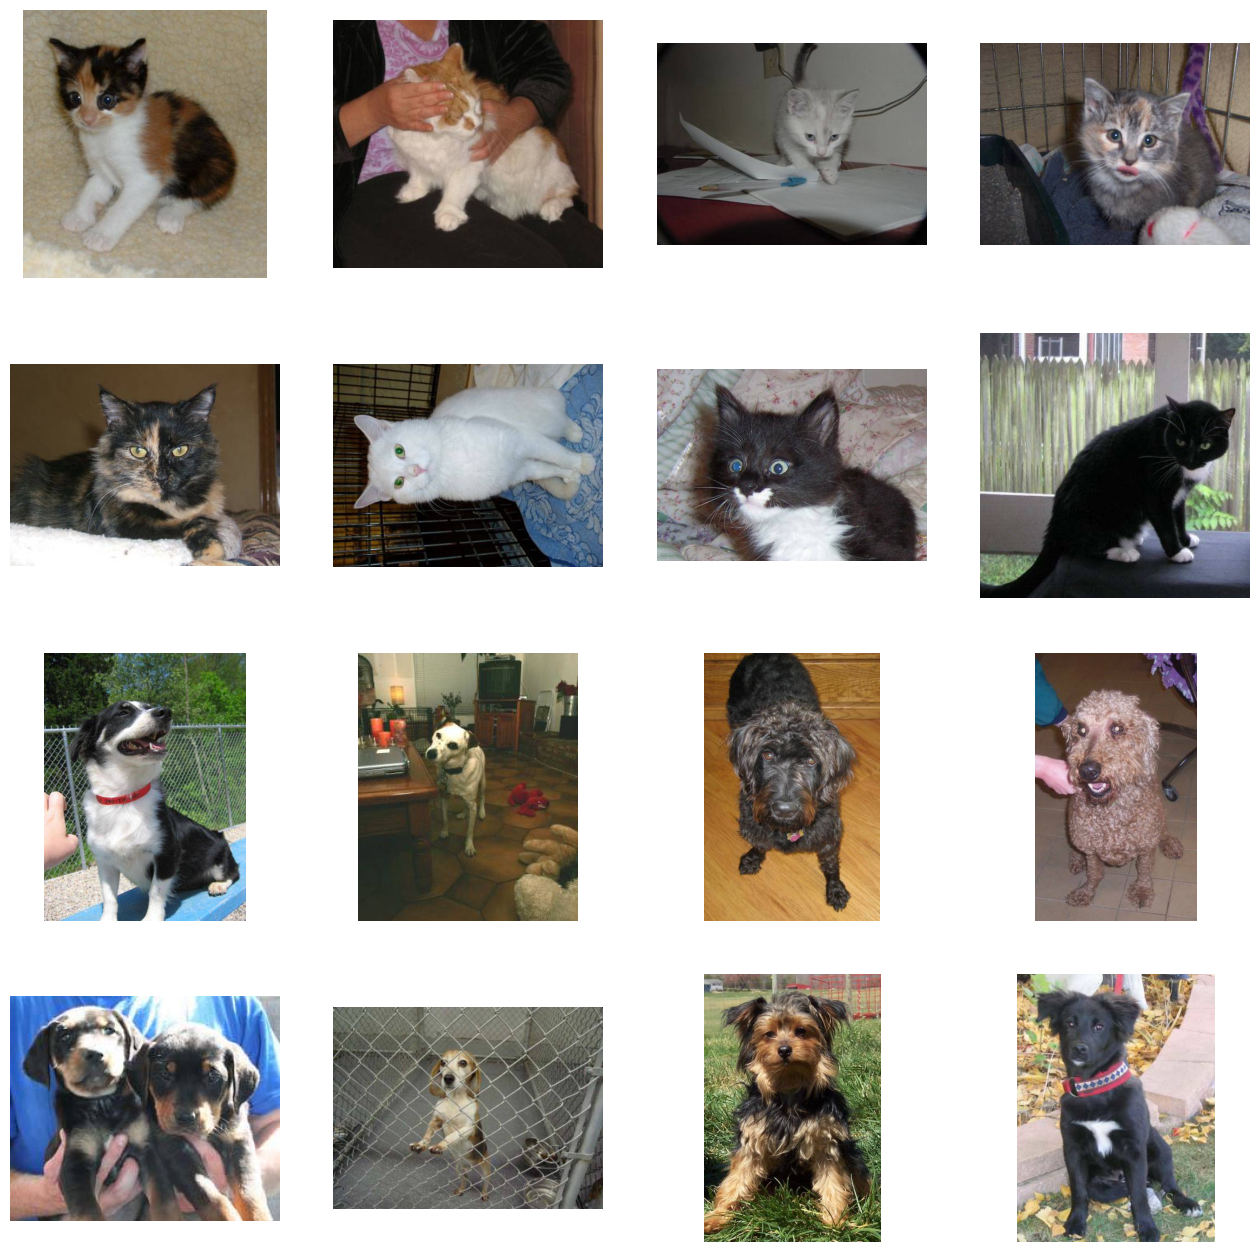

In [4]:
fig = plt.gcf() 
fig.set_size_inches(16, 16) 

cat_dir = os.path.join('/kaggle/input/dogs-vs-cats/train/cats') 
dog_dir = os.path.join('/kaggle/input/dogs-vs-cats/train/dogs') 
cat_names = os.listdir(cat_dir) 
dog_names = os.listdir(dog_dir) 

pic_index = 210

cat_images = [os.path.join(cat_dir, fname) 
			for fname in cat_names[pic_index-8:pic_index]] 
dog_images = [os.path.join(dog_dir, fname) 
			for fname in dog_names[pic_index-8:pic_index]] 

for i, img_path in enumerate(cat_images + dog_images): 
	sp = plt.subplot(4, 4, i+1) 
	sp.axis('Off') 

	img = mpimg.imread(img_path) 
	plt.imshow(img) 

plt.show() 


## Data Preparation for training

In [5]:
base_dir = '/kaggle/input/dogs-vs-cats/train'

# Create datasets 
train_datagen = image_dataset_from_directory(base_dir, 
												image_size=(200,200), 
												subset='training', 
												seed = 1, 
												validation_split=0.1, 
												batch_size= 64) 
test_datagen = image_dataset_from_directory(base_dir, 
												image_size=(200,200), 
												subset='validation', 
												seed = 1, 
												validation_split=0.1, 
												batch_size= 64)


Found 20000 files belonging to 2 classes.
Using 18000 files for training.
Found 20000 files belonging to 2 classes.
Using 2000 files for validation.


## Model Architecture

In [6]:
model = tf.keras.models.Sequential([ 
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 

	layers.Flatten(), 
	layers.Dense(512, activation='relu'), 
	layers.BatchNormalization(), 
	layers.Dense(512, activation='relu'), 
	layers.Dropout(0.1), 
	layers.BatchNormalization(), 
	layers.Dense(512, activation='relu'), 
	layers.Dropout(0.2), 
	layers.BatchNormalization(), 
	layers.Dense(1, activation='sigmoid') 
]) 


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

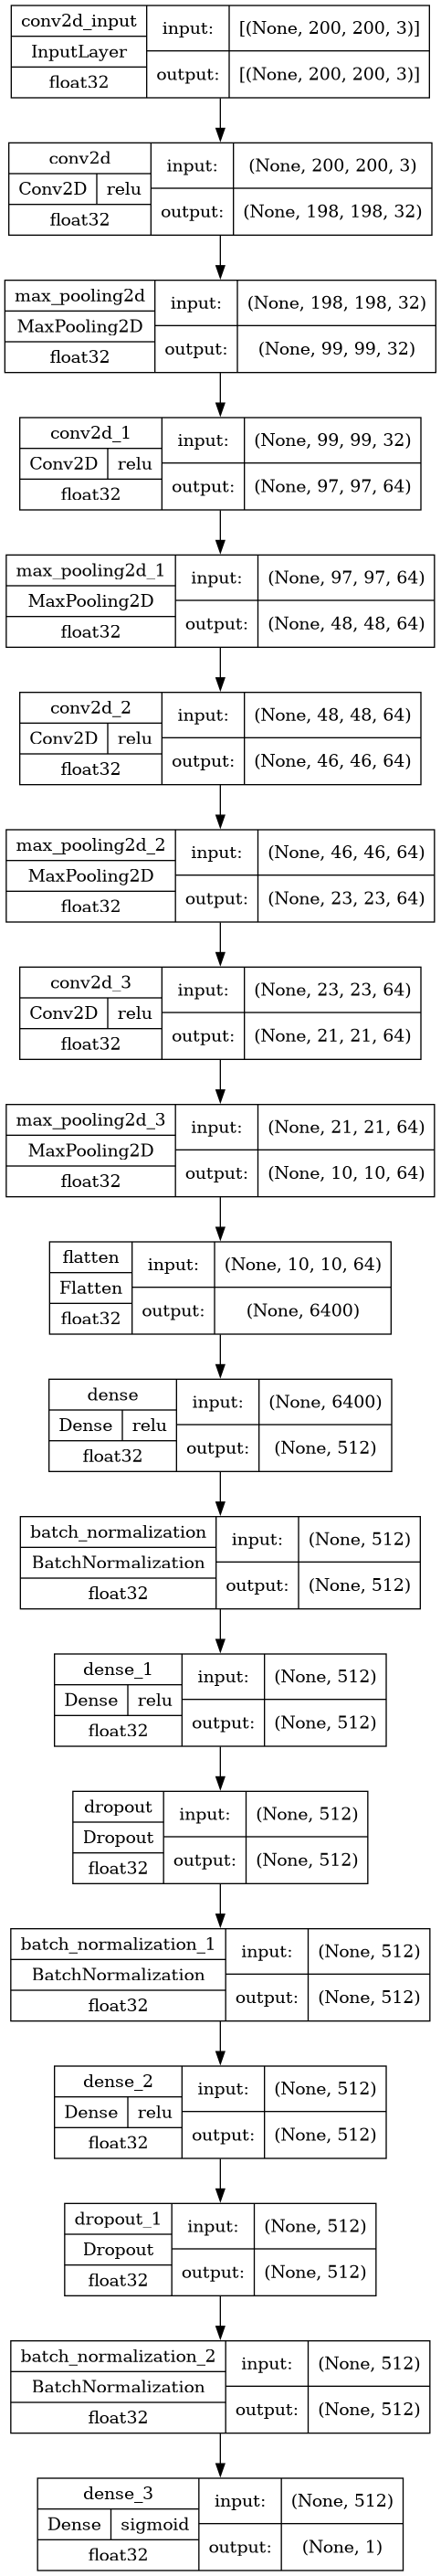

In [8]:
keras.utils.plot_model( 
	model, 
	show_shapes=True, 
	show_dtype=True, 
	show_layer_activations=True
) 


In [9]:
model.compile( 
	loss='binary_crossentropy', 
	optimizer='adam', 
	metrics=['accuracy'] 
) 

## Model Training

In [10]:
history = model.fit(train_datagen, 
		epochs=10, 
		validation_data=test_datagen) 

Epoch 1/10
282/282 [==============================] - 57s 133ms/step - loss: 0.7067 - accuracy: 0.6028 - val_loss: 0.8016 - val_accuracy: 0.4950
Epoch 2/10
282/282 [==============================] - 21s 73ms/step - loss: 0.5782 - accuracy: 0.7007 - val_loss: 1.3273 - val_accuracy: 0.5170
Epoch 3/10
282/282 [==============================] - 21s 74ms/step - loss: 0.6109 - accuracy: 0.6724 - val_loss: 0.6182 - val_accuracy: 0.6525
Epoch 4/10
282/282 [==============================] - 21s 74ms/step - loss: 0.5475 - accuracy: 0.7222 - val_loss: 0.6108 - val_accuracy: 0.6690
Epoch 5/10
282/282 [==============================] - 22s 76ms/step - loss: 0.5125 - accuracy: 0.7477 - val_loss: 1.2773 - val_accuracy: 0.5045
Epoch 6/10
282/282 [==============================] - 21s 73ms/step - loss: 0.4282 - accuracy: 0.8062 - val_loss: 0.4290 - val_accuracy: 0.8075
Epoch 7/10
282/282 [==============================] - 21s 73ms/step - loss: 0.3867 - accuracy: 0.8302 - val_loss: 0.4553 - val_accuracy

## Model Evaluation

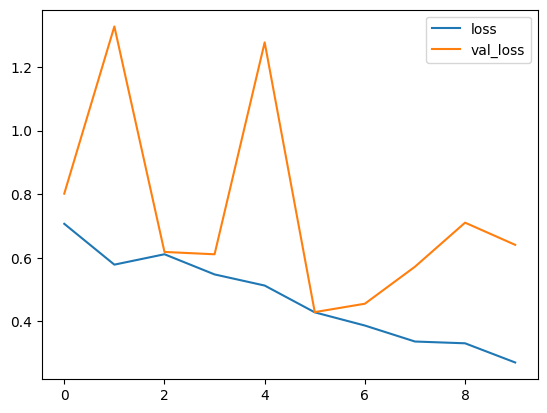

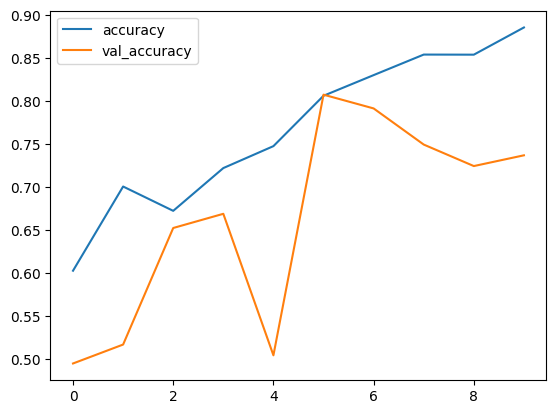

In [11]:
history_df = pd.DataFrame(history.history) 
history_df.loc[:, ['loss', 'val_loss']].plot() 
history_df.loc[:, ['accuracy', 'val_accuracy']].plot() 
plt.show() 

## Model Testing and Prediction

1/1 [==============================] - 0s 339ms/step
[[0.1790114]]
Cat


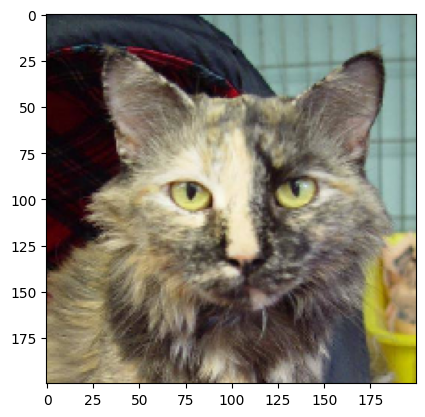

In [12]:
from keras.preprocessing import image 

#Input image 
test_image = image.load_img('/kaggle/input/dogs-vs-cats/test/cats/cat.10.jpg',target_size=(200,200)) 

#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

# Result array 
result = model.predict(test_image) 
print(result)
#Mapping result array with the main name list 
i=0
if(result>=0.5): 
    print("Dog") 
else: 
    print("Cat")


1/1 [==============================] - 0s 19ms/step
[[0.9924655]]
Dog


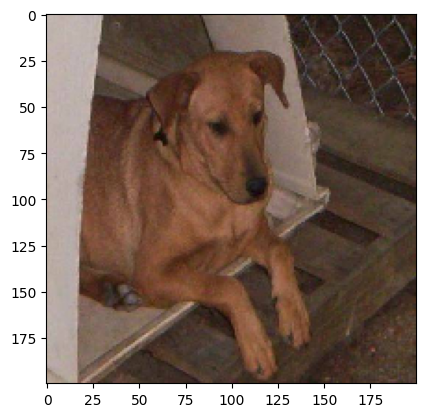

In [13]:
test_image = image.load_img('/kaggle/input/dogs-vs-cats/test/dogs/dog.100.jpg', target_size=(200, 200)) 

# For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image, axis=0) 

# Result array 
result = model.predict(test_image) 
# Mapping result array with the main name list 
i = 0
print(result)
if(result >= 0.5): 
	print("Dog") 
else: 
	print("Cat") 
